<div >
<img src = "../banner.jpg" />
</div>

<a href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202520/blob/main/Lecture11/Notebook_NN_example_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a Deep Learning

## Llamando las librerías

In [1]:
install.packages("pacman") #run this line if you use Google Colab

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Step 1: Tell reticulate NOT to create a virtual environment
Sys.setenv(RETICULATE_PYTHON = "/usr/bin/python3")
Sys.setenv(RETICULATE_PYTHON_FALLBACK = "/usr/bin/python3")

# Step 2: Install packages
install.packages("reticulate")
install.packages("keras")

# Step 3: Load reticulate
library(reticulate)

# Step 4: Use system Python (no virtual env)
use_python("/usr/bin/python3", required = TRUE)

# Step 5: Install TensorFlow to system Python
system("pip3 install tensorflow keras numpy")

# Step 6: Load keras
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The keras package is deprecated. Use the keras3 package instead.



In [3]:
require("pacman")

p_load("tidyverse","modeldata")

data("ames", package = "modeldata")

head(ames)

Loading required package: pacman



MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


### ¿Qué es Keras?

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Keras proporciona una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo en una variedad de plataformas. La biblioteca Keras es conocida por ser fácil de usar, modular y extensible. Permite a los usuarios crear modelos de aprendizaje profundo con pocas líneas de código y está diseñada para ser utilizada en combinación con otras bibliotecas populares de Python, como TensorFlow.

Keras ofrece una amplia gama de  funciones de pérdida, optimizadores y métricas de evaluación que se pueden utilizar para entrenar y evaluar modelos.

En el caso específico de `R`, la instalación de Keras puede ser  complicada si no se tienen todas las dependencias y configuraciones necesarias en su lugar. Por ejemplo, es necesario tener TensorFlow instalado correctamente antes de poder instalar y utilizar Keras en R. También puede ser necesario instalar otras dependencias adicionales, como el paquete reticulate, que se utiliza para conectar `R` con `Python`. Para saber más de cómo instalar keras localmente pueden ir [acá](https://tensorflow.rstudio.com/install/). Por ello mi recomendación es utilizar google Colab.

## Entrenando una red muy simple


In [4]:
y<- ames$Sale_Price/1000
X<- as.matrix(ames  %>% select(Full_Bath,Bedroom_AbvGr))
head(X)

Full_Bath,Bedroom_AbvGr
1,3
1,2
1,3
2,3
2,3
2,3


In [5]:
dim(X)

[1] 2930    2

In [6]:
head(y)

[1] 215.0 105.0 172.0 244.0 189.9 195.5

<div >
 <img src = "figs/networkexample.png" />
</div>

In [7]:
snn <- keras_model_sequential() %>%
  layer_dense(units = 2,
              activation = "sigmoid",
              input_shape = 2) %>%
  layer_dense(units = 1)


In [8]:
summary(snn)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 2)                       6           
 dense (Dense)                      (None, 1)                       3           
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [9]:
snn %>% compile(loss = "mse",
                  optimizer = 'sgd',
                  metrics = list("mean_squared_error") # H.W. probar también mean_absolute_error
)


set.seed(10101)
history <- snn %>% fit(
  X, y,
  epochs = 30,
  batch_size = 2930 # todas las observaciones
)

In [10]:
history


Final epoch (plot to see history):
              loss: 7,374
mean_squared_error: 7,374 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the keras package.
  Please report the issue at <https://github.com/rstudio/keras3/issues>.”


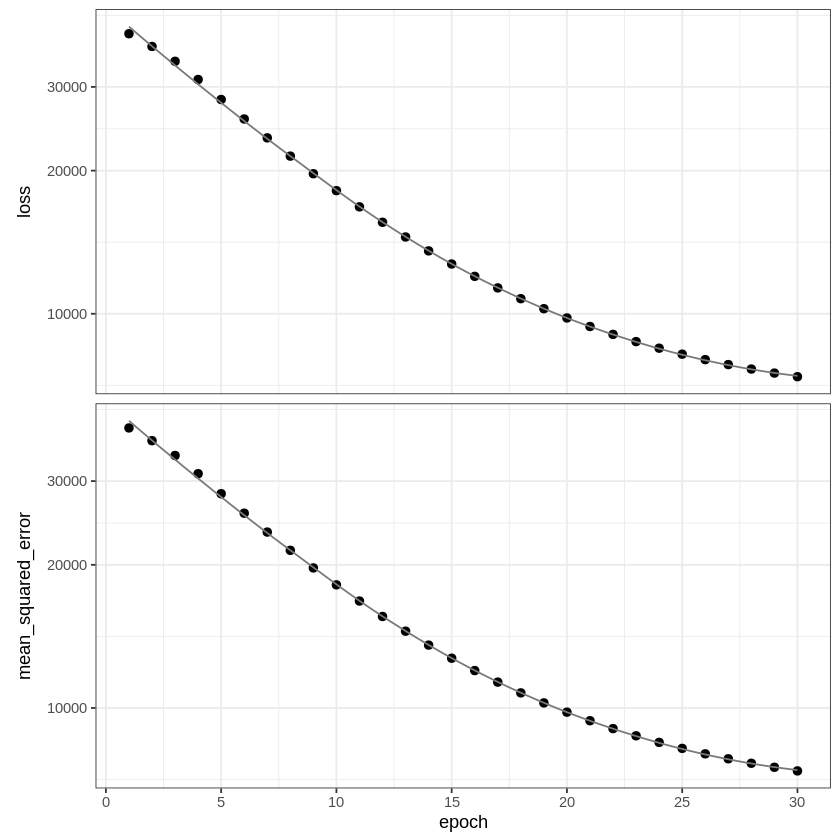

In [11]:
plot(history,method="ggplot2",theme_bw=TRUE)+scale_y_log10()